In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import scipy
# pip install optuna loguru pandas scikit-learn googledrivedownloader matplotlib captum seaborn

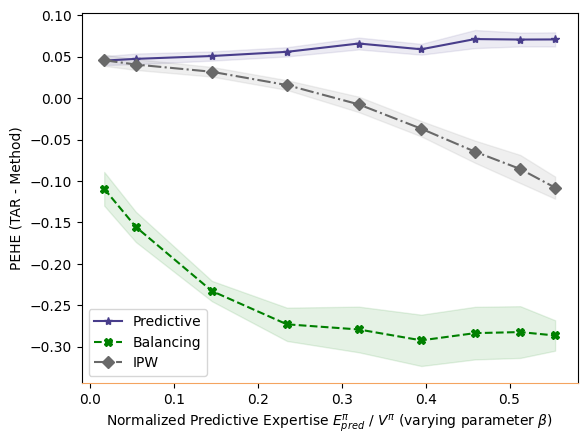

[0.01697592 0.05471343 0.14531764 0.23471971 0.32030434 0.39488254
 0.45883647 0.5127692  0.55432286]
[0.12525332821635982, 0.12763182053590436, 0.13332476822053194, 0.14209971332923133, 0.15936587375482963, 0.15683098433704204, 0.1682546588293229, 0.17596072668421303, 0.1723362881601364]
[0.11388196 0.11402395 0.12058651 0.13086253 0.14621353 0.14437575
 0.15280678 0.16218496 0.15941488]
[0.13662469 0.14123969 0.14606302 0.1533369  0.17251822 0.16928621
 0.18370253 0.18973649 0.1852577 ]


In [2]:
ceval = []
ceerr = []
cfrval = []
cfrerr = []
tarval = []
tarerr = []
ipwval = []
ipwerr = []
paths = ["0.1.txt", "0.5.txt", "1.0.txt", "1.5.txt", "2.0.txt", "2.5.txt", "3.0.txt", "3.5.txt", "4.0.txt"]
for i in range(len(paths)):
    ce = []
    cfr = []
    tar = []
    ipw = []
    flag = False
    with open("pred" + paths[i], "r") as myfile:
        for line in myfile:
            if flag:
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                tar.append(float(temp[0]))
                ipw.append(float(temp[-1]))
            if "seed" in line:
                flag = True

    ceval.append(np.mean(np.array(tar) - np.array(ce)))
    ceerr.append(scipy.stats.sem(np.array(tar) - np.array(ce)))
    cfrval.append(np.mean(np.array(tar) - np.array(cfr)))
    cfrerr.append(scipy.stats.sem(np.array(tar) - np.array(cfr)))
    ipwval.append(np.mean(np.array(tar) - np.array(ipw)))
    ipwerr.append(scipy.stats.sem(np.array(tar) - np.array(ipw)))
    tarval.append(np.mean(np.array(tar)))
    tarerr.append(scipy.stats.sem(np.array(tar)))

gtval = []
gterr = []
avval = []
averr = []
for i in range(len(paths)):
    flag = False
    gt = []
    av = []
    with open("entropypred40x" + paths[i], "r") as myfile:
        for line in myfile:
            if flag:
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                # ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                # cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                # tar.append(float(temp[0]))
                temp = temp[-1].split("gt")
                # ipw.append(float(temp[0]))
                temp = temp[-1].split("av")
                gt.append(float(temp[0]))
                av.append(float(temp[-1]))
            if "seed" in line:
                flag = True

    gtval.append(np.mean(np.array(gt)))
    gterr.append(scipy.stats.sem(np.array(gt)))
    avval.append(np.mean(np.array(av)))
    averr.append(scipy.stats.sem(np.array(av)))

xaxis = range(len(paths))
ax = plt.axes()
ax.spines['bottom'].set_color("sandybrown")

plt.plot(np.array(gtval) / np.array(avval), np.array(ceval), label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.plot(np.array(gtval) / np.array(avval), np.array(cfrval), label="Balancing", color="green", linestyle="--", marker="X")
plt.plot(np.array(gtval) / np.array(avval), np.array(ipwval), label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ceval)-np.array(ceerr)), (np.array(ceval)+np.array(ceerr)), alpha=0.1, color="darkslateblue")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(cfrval)-np.array(cfrerr)), (np.array(cfrval)+np.array(cfrerr)), alpha=0.1, color="green")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ipwval)-np.array(ipwerr)), (np.array(ipwval)+np.array(ipwerr)), alpha=0.1, color="dimgray")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel("PEHE (TAR - Method)")
plt.savefig("propscale.pdf")
plt.show()

print(np.array(gtval) / np.array(avval))
print(tarval)
print((np.array(tarval)-np.array(tarerr)))
print((np.array(tarval)+np.array(tarerr)))

## Expertise and Randomness

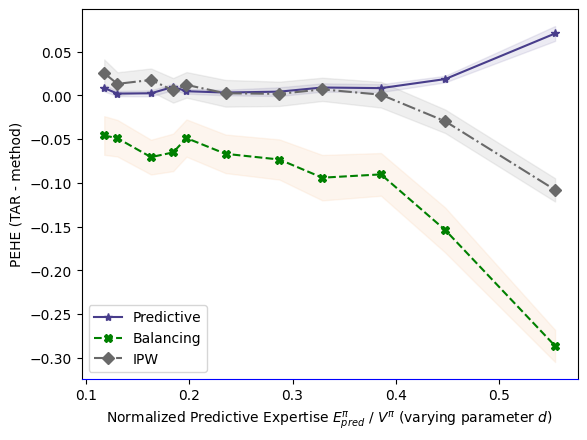

[0.11762824 0.13042892 0.16294149 0.18439717 0.19731808 0.23513063
 0.2872978  0.32888807 0.3856896  0.44787606 0.55432286]
[1.89675252 1.86262722 1.67083784 1.61903933 1.71005945 1.78731501
 1.60782126 1.27655064 0.92284761 0.63833566 0.17233629]
[1.66453321 1.63074522 1.42270805 1.40819028 1.51216026 1.57882007
 1.42627507 1.12787107 0.82500282 0.56605537 0.15941488]
[2.12897183 2.09450922 1.91896763 1.82988837 1.90795865 1.99580995
 1.78936745 1.42523022 1.0206924  0.71061595 0.1852577 ]


In [3]:
ce = []
cfr = []
ipw = []
tar = []
with open("pred4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            ce.append(list())
            cfr.append(list())
            ipw.append(list())
            tar.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("van")
            ipw[seed-1].append(float(temp[0]))

ceval = np.flip(np.mean(np.array(tar) - np.array(ce), axis=0))
ceerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(ce), axis=0))
cfrval = np.flip(np.mean(np.array(tar) - np.array(cfr), axis=0))
cfrerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(cfr), axis=0))
ipwval = np.flip(np.mean(np.array(tar) - np.array(ipw), axis=0))
ipwerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(ipw), axis=0))
tarval = np.flip(np.mean(np.array(tar), axis=0))
tarerr = np.flip(scipy.stats.sem(np.array(tar), axis=0))

gt = []
av = []
with open("entropypred40x4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            gt.append(list())
            av.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            # ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            # cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            # tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("gt")
            # ipw[seed-1].append(float(temp[0]))
            temp = temp[-1].split("av")
            gt[seed-1].append(float(temp[0]))
            av[seed-1].append(float(temp[-1]))

gtval = np.flip(np.mean(np.array(gt), axis=0))
gterr = np.flip(scipy.stats.sem(np.array(gt), axis=0))
avval = np.flip(np.mean(np.array(av), axis=0))
averr = np.flip(scipy.stats.sem(np.array(av), axis=0))

ax = plt.axes()
ax.spines['bottom'].set_color("blue")

plt.plot(gtval / avval, ceval, label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.fill_between(gtval / avval, (ceval-ceerr), (ceval+ceerr), alpha=0.1, color="darkslateblue")
plt.plot(gtval / avval, cfrval, label="Balancing", color="green", linestyle="--", marker="X")
plt.fill_between(gtval / avval, (cfrval-cfrerr), (cfrval+cfrerr), alpha=0.1, color="sandybrown")
plt.plot(gtval / avval, ipwval, label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(gtval / avval, (ipwval-ipwerr), (ipwval+ipwerr), alpha=0.1, color="dimgray")

plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel("PEHE (TAR - method)")
plt.savefig("feature.pdf")
plt.show()

print(gtval/avval)
print(tarval)
print(tarval-tarerr)
print(tarval+tarerr)

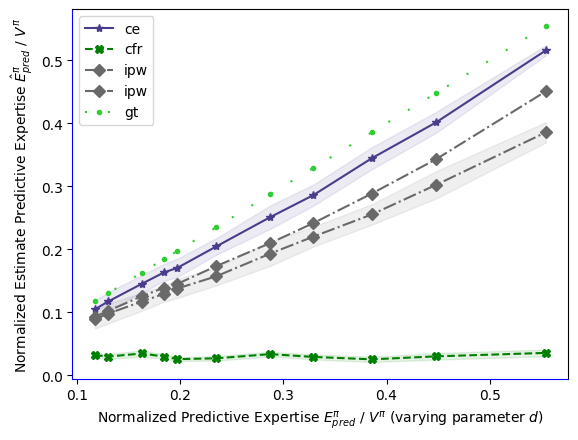

[0.11762824 0.13042892 0.16294149 0.18439717 0.19731808 0.23513063
 0.2872978  0.32888807 0.3856896  0.44787606 0.55432286]
[0.10485193 0.11719639 0.14524141 0.16324717 0.17048373 0.2045331
 0.25099005 0.28575547 0.34446489 0.40128643 0.51569257]
[0.09088629 0.10256595 0.13145592 0.1498083  0.15582572 0.19152175
 0.23238879 0.2689922  0.32705922 0.3847249  0.50781767]
[0.11881757 0.13182683 0.15902689 0.17668603 0.18514175 0.21754445
 0.26959131 0.30251874 0.36187057 0.41784796 0.52356746]


In [4]:
ce = []
cfr = []
ipw = []
tar = []
gt = []
av = []
with open("entropypred40x4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            ce.append(list())
            cfr.append(list())
            ipw.append(list())
            tar.append(list())
            gt.append(list())
            av.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("gt")
            ipw[seed-1].append(float(temp[0]))
            temp = temp[-1].split("av")
            gt[seed-1].append(float(temp[0]))
            av[seed-1].append(float(temp[-1]))

ceval = np.flip(np.mean(np.array(ce), axis=0))
ceerr = np.flip(scipy.stats.sem(np.array(ce), axis=0))
cfrval = np.flip(np.mean(np.array(cfr), axis=0))
cfrerr = np.flip(scipy.stats.sem(np.array(cfr), axis=0))
ipwval = np.flip(np.mean(np.array(ipw), axis=0))
ipwerr = np.flip(scipy.stats.sem(np.array(ipw), axis=0))
tarval = np.flip(np.mean(np.array(tar), axis=0))
tarerr = np.flip(scipy.stats.sem(np.array(tar), axis=0))
gtval = np.flip(np.mean(np.array(gt), axis=0))
gterr = np.flip(scipy.stats.sem(np.array(gt), axis=0))
avval = np.flip(np.mean(np.array(av), axis=0))
averr = np.flip(scipy.stats.sem(np.array(av), axis=0))
xaxis = range(len(ceval))
my_xticks = ['irrelevant', '', '', '', '', '', '', 'predictive']


ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")

plt.plot(gtval / avval, ceval / avval, label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(gtval / avval, cfrval / avval, label="cfr", color="green", linestyle="--", marker="X")
plt.plot(gtval / avval, ipwval / avval, label="ipw", color="dimgray", linestyle="-.", marker="D")
plt.plot(gtval / avval, tarval / avval, label="ipw", color="dimgray", linestyle="-.", marker="D")
plt.plot(gtval / avval, gtval / avval, label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(gtval / avval, (ceval-ceerr) / avval, (ceval+ceerr) / avval, alpha=0.1, color="darkslateblue")
plt.fill_between(gtval / avval, (cfrval-cfrerr) / avval, (cfrval+cfrerr) / avval, alpha=0.1, color="green")
plt.fill_between(gtval / avval, (ipwval-ipwerr) / avval, (ipwval+ipwerr) / avval, alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (tarval[indices][start:]-tarerr[indices][start:]) / avval[indices][start:], (tarval[indices][start:]+tarerr[indices][start:]) / avval[indices][start:], alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (gtval[indices][start:]-gterr[indices][start:]) / avval[indices][start:], (gtval[indices][start:]+gterr[indices][start:]) / avval[indices][start:], alpha=0.1, color="limegreen")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("featureexpertise.pdf")
plt.show()

print(gtval/avval)
print(ceval/avval)
print(ceval/avval-ceerr/avval)
print(ceval/avval+ceerr/avval)

with open("test.txt", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((gtval/avval)[i]) + " " + str((ceval/avval)[i]))
        f.write("\n")

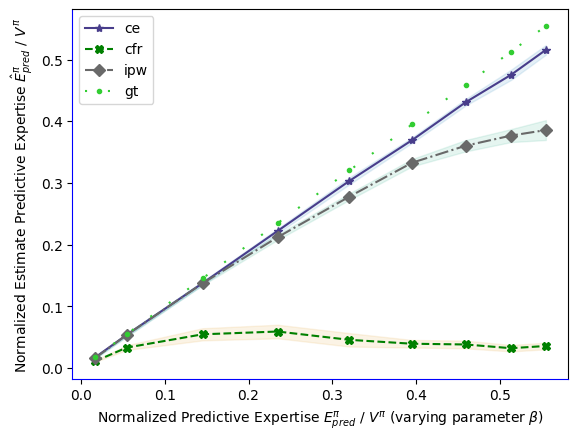

[0.01697592 0.05471343 0.14531764 0.23471971 0.32030434 0.39488254
 0.45883647 0.5127692  0.55432286]
[0.01693463 0.05359405 0.13753934 0.22216052 0.30336555 0.36931958
 0.43083597 0.4751817  0.51569257]
[0.01566042 0.05121797 0.13456022 0.21832165 0.29770499 0.36492087
 0.42548614 0.4668621  0.50781767]
[0.01820884 0.05597013 0.14051846 0.22599939 0.30902611 0.37371829
 0.4361858  0.4835013  0.52356746]


In [5]:
cblind_palete = sns.color_palette("colorblind", as_cmap=True)
ceval = []
ceerr = []
cfrval = []
cfrerr = []
tarval = []
tarerr = []
ipwval = []
ipwerr = []
gtval = []
gterr = []
avval = []
averr = []
paths = ["0.1.txt", "0.5.txt", "1.0.txt", "1.5.txt", "2.0.txt", "2.5.txt", "3.0.txt", "3.5.txt", "4.0.txt"]
for i in range(len(paths)):
    ce = []
    cfr = []
    tar = []
    ipw = []
    flag = False
    gt = []
    av = []
    with open("entropypred40x" + paths[i], "r") as myfile:
        for line in myfile:
            if flag:
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                tar.append(float(temp[0]))
                temp = temp[-1].split("gt")
                ipw.append(float(temp[0]))
                temp = temp[-1].split("av")
                gt.append(float(temp[0]))
                av.append(float(temp[-1]))
            if "seed" in line:
                flag = True

    ceval.append(np.mean(np.array(ce)))
    ceerr.append(scipy.stats.sem(np.array(ce)))
    cfrval.append(np.mean(np.array(cfr)))
    cfrerr.append(scipy.stats.sem(np.array(cfr)))
    ipwval.append(np.mean(np.array(ipw)))
    ipwerr.append(scipy.stats.sem(np.array(ipw)))
    gtval.append(np.mean(np.array(gt)))
    gterr.append(scipy.stats.sem(np.array(gt)))
    avval.append(np.mean(np.array(av)))
    averr.append(scipy.stats.sem(np.array(av)))
    tarval.append(np.mean(np.array(tar)))
    tarerr.append(scipy.stats.sem(np.array(tar)))

xaxis = range(len(paths))

ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")
plt.plot(np.array(gtval) / np.array(avval), np.array(ceval) / np.array(avval), label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(np.array(gtval) / np.array(avval), np.array(cfrval) / np.array(avval), label="cfr", color="green", linestyle="--", marker="X")
plt.plot(np.array(gtval) / np.array(avval), np.array(ipwval) / np.array(avval), label="ipw", color="dimgray", linestyle="-.", marker="D")
plt.plot(np.array(gtval) / np.array(avval), np.array(gtval) / np.array(avval), label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ceval)-np.array(ceerr)) / np.array(avval), (np.array(ceval)+np.array(ceerr)) / np.array(avval), alpha=0.1, color=cblind_palete[0])
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(cfrval)-np.array(cfrerr)) / np.array(avval), (np.array(cfrval)+np.array(cfrerr)) / np.array(avval), alpha=0.1, color=cblind_palete[1])
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ipwval)-np.array(ipwerr)) / np.array(avval), (np.array(ipwval)+np.array(ipwerr)) / np.array(avval), alpha=0.1, color=cblind_palete[2])
# plt.fill_between(xaxis, (np.array(gtval)-np.array(gterr)) / np.array(avval), (np.array(gtval)+np.array(gterr)) / np.array(avval), alpha=0.1, color=cblind_palete[3])
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("propscaleexpertise.pdf")
plt.show()

print(np.array(gtval) / np.array(avval))
print(np.array(ceval) / np.array(avval))
print((np.array(ceval)-np.array(ceerr)) / np.array(avval))
print((np.array(ceval)+np.array(ceerr)) / np.array(avval))